In [3]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN
import utils_2 as ut2
from traindata import trainData
import errores as er



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

sns.set_style("darkgrid")


import numpy as np
import random
import os, errno
from tqdm import tqdm

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torch.utils.data as data_utils


np.random.seed(seed=77)
torch.manual_seed(77)

In [4]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Amplitude')
train, val, test = data.split_data('Amplitude')

## **scaler**

In [5]:
# sub sampleo

train = utils.subsample(train, 2)
val = utils.subsample(val, 2)
test = utils.subsample(test, 2)

In [6]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.reshape(-1, 1))
val_scaled = scaler.transform(val.reshape(-1, 1))
test_scaled = scaler.transform(test.reshape(-1, 1))

In [17]:
#x_train, y_train = ut2.create_sequences(train_scaled[:10000], 1000, 1)
#x_val, y_val = ut2.create_sequences(val_scaled[:5000], 1000, 1)
#x_test, y_test = ut2.create_sequences(test_scaled[:3000], 1000, 1)

In [18]:
x_train, y_train = ut2.create_sequences(train_scaled[:], 1000, 1)
x_val, y_val = ut2.create_sequences(val_scaled[:], 1000, 1)
x_test, y_test = ut2.create_sequences(test_scaled[:], 1000, 1)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((9000, 1000, 1),
 (9000, 1),
 (4000, 1000, 1),
 (4000, 1),
 (2000, 1000, 1),
 (2000, 1))

In [19]:
x_train = torch.from_numpy(x_train.astype(np.float32)).squeeze()
y_train = torch.from_numpy(y_train.astype(np.float32)).squeeze()
x_val = torch.from_numpy(x_val.astype(np.float32)).squeeze()
y_val = torch.from_numpy(y_val.astype(np.float32)).squeeze()
x_test = torch.from_numpy(x_test.astype(np.float32)).squeeze()
y_test = torch.from_numpy(y_test.astype(np.float32)).squeeze()

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

(torch.Size([9000, 1000]),
 torch.Size([9000]),
 torch.Size([4000, 1000]),
 torch.Size([4000]),
 torch.Size([2000, 1000]),
 torch.Size([2000]))

## **Single step**

In [20]:
class MLP(nn.Module):
    '''
    Multi-layer perceptron for non-linear regression.
    '''
    def __init__(self, in_size, hid_size, out_size):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(in_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, out_size)
        )

    def forward(self, x):
        return(self.layers(x))

In [21]:
in_size = x_train.shape[-1]
out_size = 1
hid_size = x_train.shape[-1]//2
num_layers = 2

model = MLP(in_size, hid_size, out_size)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

  0%|          | 0/100 [00:00<?, ?it/s]

  4%|▍         | 4/100 [00:04<01:55,  1.20s/it]

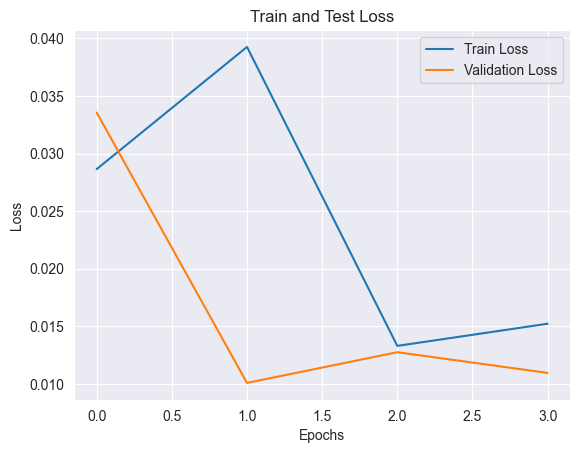

  5%|▌         | 5/100 [00:06<02:12,  1.40s/it]

Epoch :0.05    Train Loss :0.013181628659367561    Test Loss :0.008563011884689331


  9%|▉         | 9/100 [00:11<01:52,  1.23s/it]

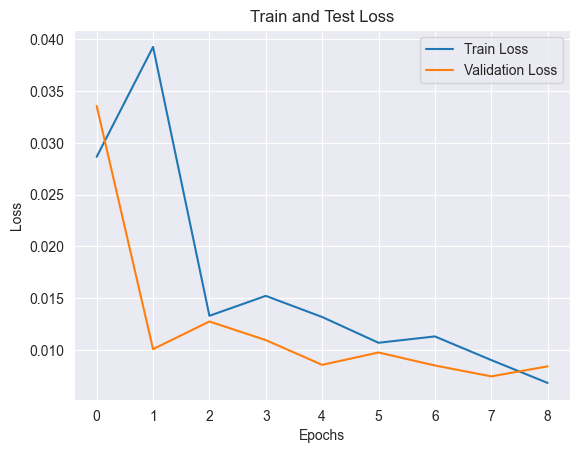

 10%|█         | 10/100 [00:13<02:01,  1.35s/it]

Epoch :0.1    Train Loss :0.006479786708950996    Test Loss :0.00819258764386177


 13%|█▎        | 13/100 [00:16<01:48,  1.24s/it]

Early stopping at epoch:  12


 14%|█▍        | 14/100 [00:17<01:45,  1.22s/it]

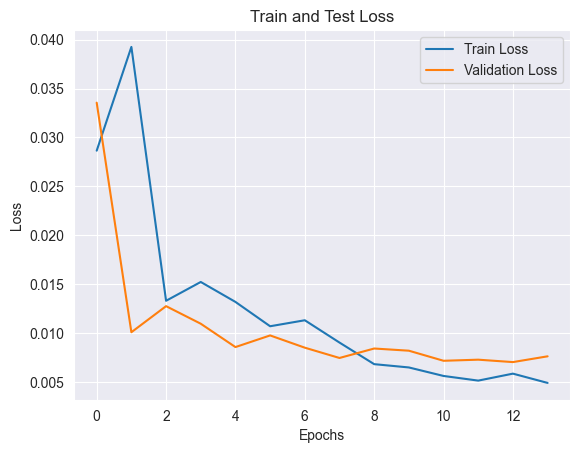

 15%|█▌        | 15/100 [00:19<01:54,  1.35s/it]

Epoch :0.15    Train Loss :0.004381690174341202    Test Loss :0.00784758385270834
Early stopping at epoch:  14


 16%|█▌        | 16/100 [00:20<01:50,  1.31s/it]

Early stopping at epoch:  15


 19%|█▉        | 19/100 [00:24<01:39,  1.23s/it]

Early stopping at epoch:  18


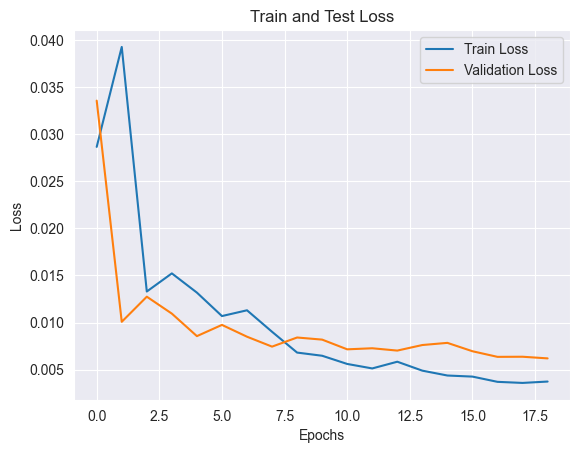

 20%|██        | 20/100 [00:25<01:48,  1.36s/it]

Epoch :0.2    Train Loss :0.0033132804092019796    Test Loss :0.006345850881189108


 21%|██        | 21/100 [00:27<01:43,  1.32s/it]

Early stopping at epoch:  20


 22%|██▏       | 22/100 [00:28<01:40,  1.29s/it]

Early stopping at epoch:  21


 23%|██▎       | 23/100 [00:29<01:36,  1.25s/it]

Early stopping at epoch:  22


 24%|██▍       | 24/100 [00:30<01:33,  1.23s/it]

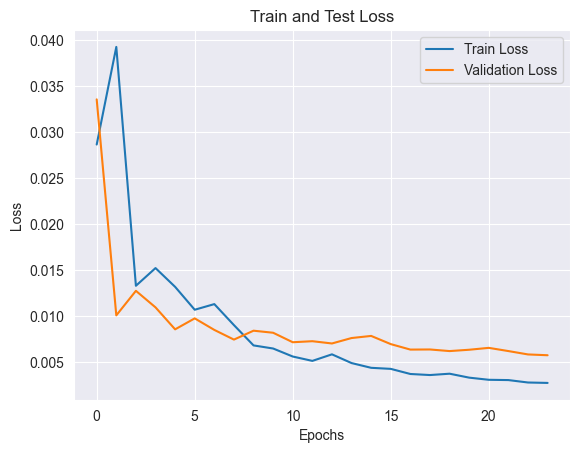

 25%|██▌       | 25/100 [00:32<01:40,  1.34s/it]

Epoch :0.25    Train Loss :0.0027992879040539265    Test Loss :0.005685847252607346


 27%|██▋       | 27/100 [00:34<01:32,  1.26s/it]

Early stopping at epoch:  26


 29%|██▉       | 29/100 [00:36<01:25,  1.21s/it]

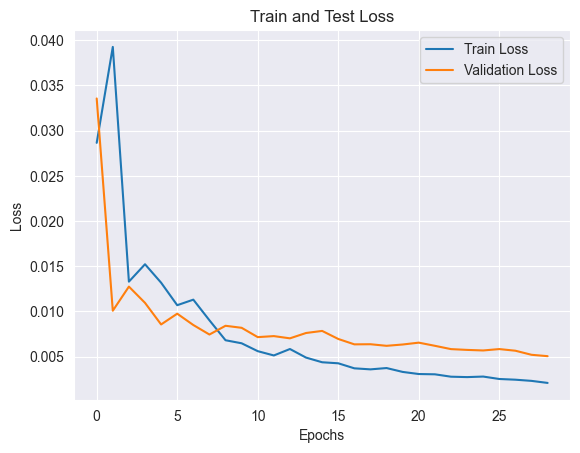

 30%|███       | 30/100 [00:38<01:32,  1.32s/it]

Epoch :0.3    Train Loss :0.002100607380270958    Test Loss :0.00488639110699296


 33%|███▎      | 33/100 [00:41<01:20,  1.20s/it]

Early stopping at epoch:  32


 34%|███▍      | 34/100 [00:43<01:19,  1.20s/it]

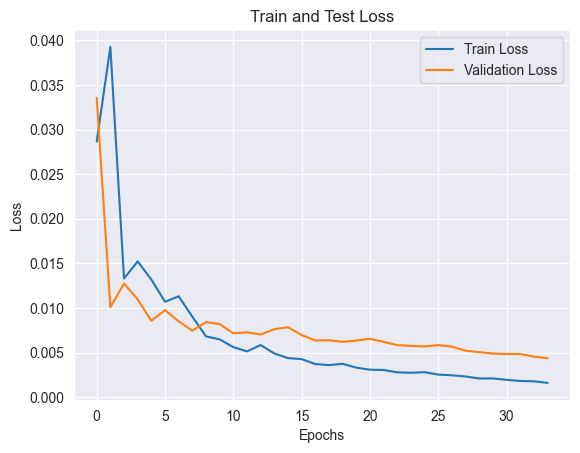

 35%|███▌      | 35/100 [00:44<01:26,  1.33s/it]

Epoch :0.35    Train Loss :0.0015937353018671274    Test Loss :0.004265798255801201


 37%|███▋      | 37/100 [00:47<01:19,  1.26s/it]

Early stopping at epoch:  36


 39%|███▉      | 39/100 [00:49<01:14,  1.22s/it]

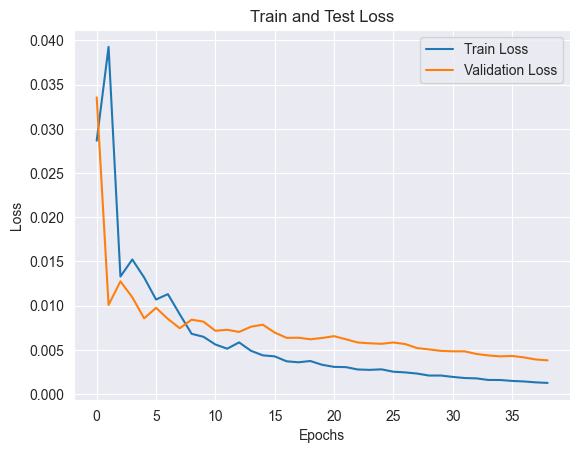

 40%|████      | 40/100 [00:51<01:20,  1.34s/it]

Epoch :0.4    Train Loss :0.001214266405440867    Test Loss :0.003812728449702263


 44%|████▍     | 44/100 [00:55<01:08,  1.23s/it]

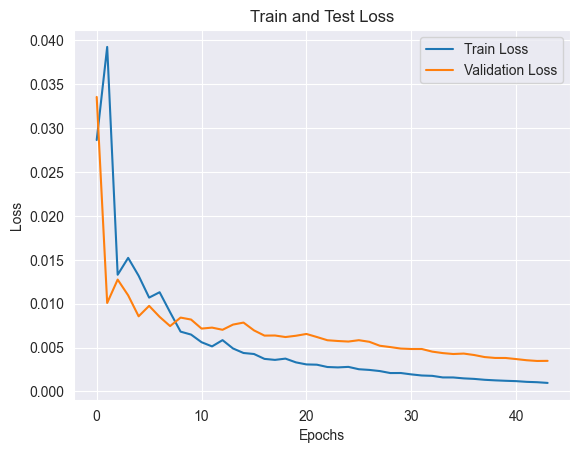

 45%|████▌     | 45/100 [00:57<01:14,  1.36s/it]

Epoch :0.45    Train Loss :0.0009788789320737123    Test Loss :0.0032755075953900814
Early stopping at epoch:  44


 49%|████▉     | 49/100 [01:02<01:02,  1.22s/it]

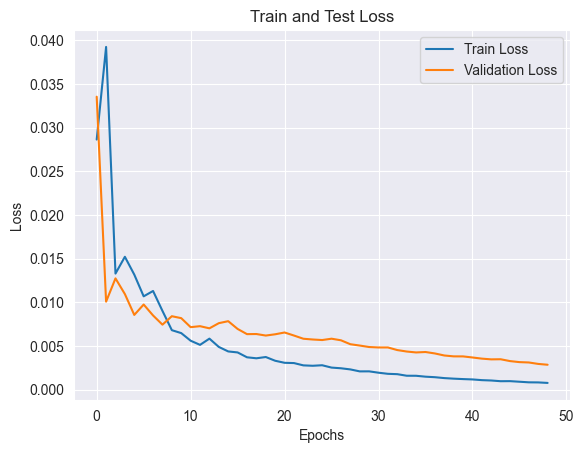

 50%|█████     | 50/100 [01:03<01:06,  1.33s/it]

Epoch :0.5    Train Loss :0.0007305039907805622    Test Loss :0.0028178184293210506


 54%|█████▍    | 54/100 [01:08<00:56,  1.23s/it]

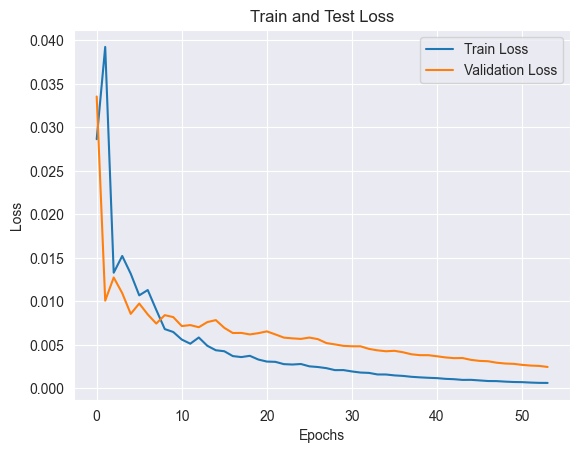

 55%|█████▌    | 55/100 [01:10<01:00,  1.35s/it]

Epoch :0.55    Train Loss :0.0005893518682569265    Test Loss :0.002369188005104661


 59%|█████▉    | 59/100 [01:15<00:50,  1.22s/it]

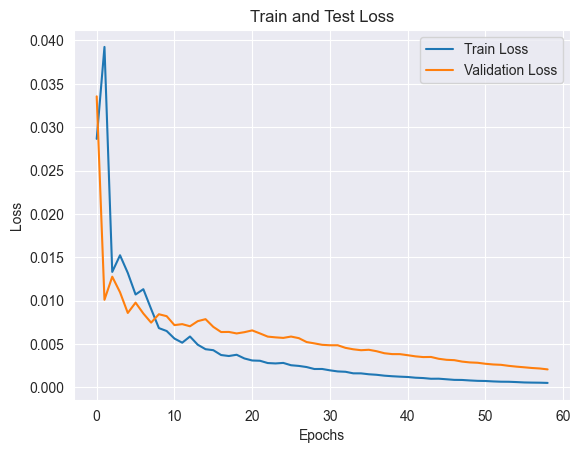

 60%|██████    | 60/100 [01:16<00:54,  1.36s/it]

Epoch :0.6    Train Loss :0.0004575977218337357    Test Loss :0.0019857226870954037


 64%|██████▍   | 64/100 [01:21<00:43,  1.21s/it]

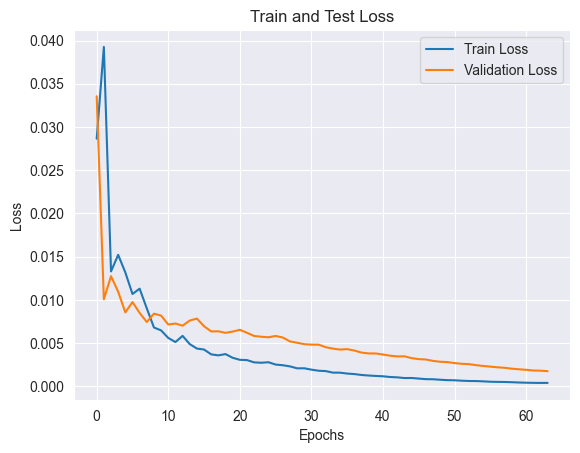

 65%|██████▌   | 65/100 [01:22<00:46,  1.32s/it]

Epoch :0.65    Train Loss :0.00044013586011715233    Test Loss :0.0018504944164305925


 66%|██████▌   | 66/100 [01:24<00:43,  1.28s/it]

Early stopping at epoch:  65


 67%|██████▋   | 67/100 [01:25<00:41,  1.25s/it]

Early stopping at epoch:  66


 68%|██████▊   | 68/100 [01:26<00:39,  1.24s/it]

Early stopping at epoch:  67


 69%|██████▉   | 69/100 [01:27<00:37,  1.21s/it]

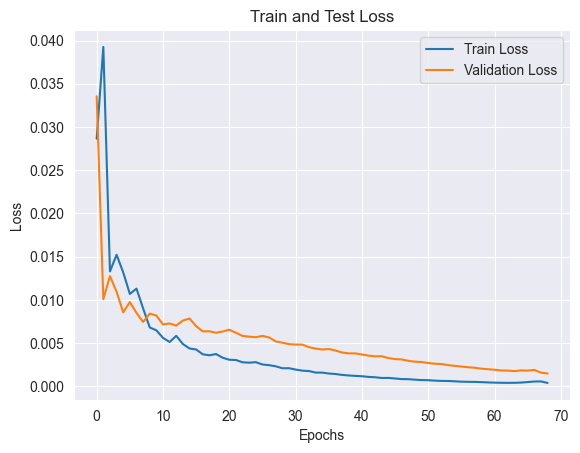

 70%|███████   | 70/100 [01:29<00:40,  1.34s/it]

Epoch :0.7    Train Loss :0.00031638721702620387    Test Loss :0.0016172750620171428


 71%|███████   | 71/100 [01:30<00:37,  1.29s/it]

Early stopping at epoch:  70


 72%|███████▏  | 72/100 [01:31<00:35,  1.26s/it]

Early stopping at epoch:  71


 74%|███████▍  | 74/100 [01:34<00:31,  1.22s/it]

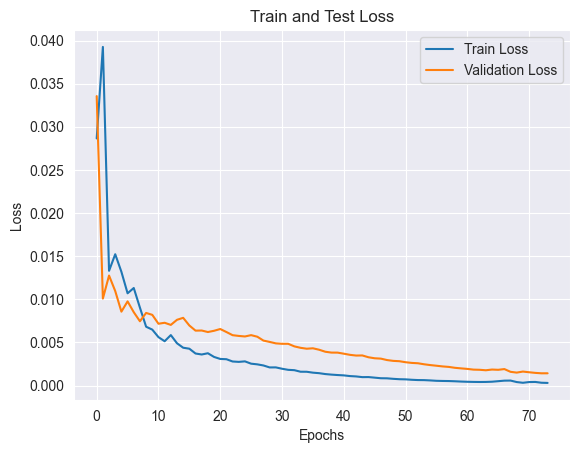

 75%|███████▌  | 75/100 [01:35<00:33,  1.36s/it]

Epoch :0.75    Train Loss :0.00035936932545155287    Test Loss :0.0014434867771342397
Early stopping at epoch:  74


 76%|███████▌  | 76/100 [01:36<00:31,  1.32s/it]

Early stopping at epoch:  75


 79%|███████▉  | 79/100 [01:40<00:26,  1.26s/it]

Early stopping at epoch:  78


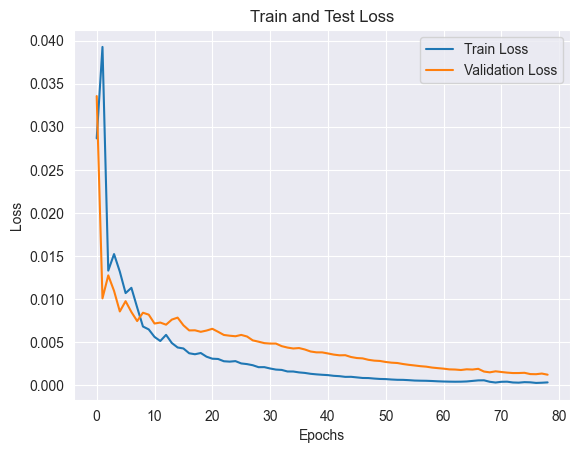

 80%|████████  | 80/100 [01:42<00:27,  1.36s/it]

Epoch :0.8    Train Loss :0.0002837441279552877    Test Loss :0.00117398367729038


 82%|████████▏ | 82/100 [01:44<00:22,  1.27s/it]

Early stopping at epoch:  81


 84%|████████▍ | 84/100 [01:46<00:19,  1.21s/it]

Early stopping at epoch:  83


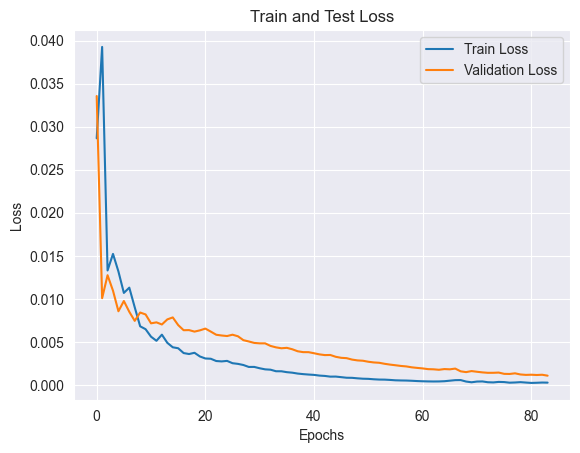

 85%|████████▌ | 85/100 [01:48<00:19,  1.32s/it]

Epoch :0.85    Train Loss :0.00023285375209525228    Test Loss :0.0010580370435491204


 87%|████████▋ | 87/100 [01:50<00:16,  1.25s/it]

Early stopping at epoch:  86


 89%|████████▉ | 89/100 [01:53<00:13,  1.21s/it]

Early stopping at epoch:  88


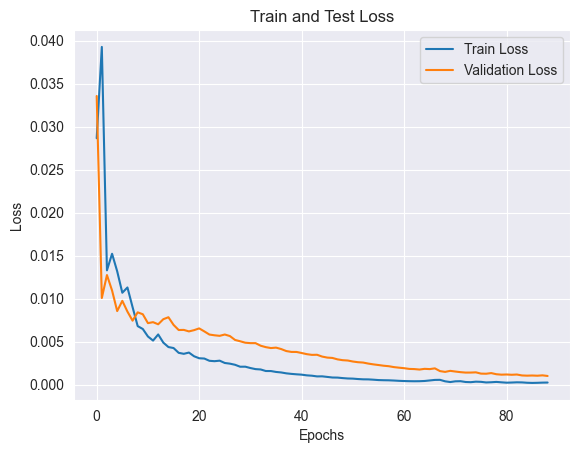

 90%|█████████ | 90/100 [01:54<00:13,  1.32s/it]

Epoch :0.9    Train Loss :0.00023994043294806033    Test Loss :0.0010187586303800344


 94%|█████████▍| 94/100 [01:59<00:07,  1.19s/it]

Early stopping at epoch:  93


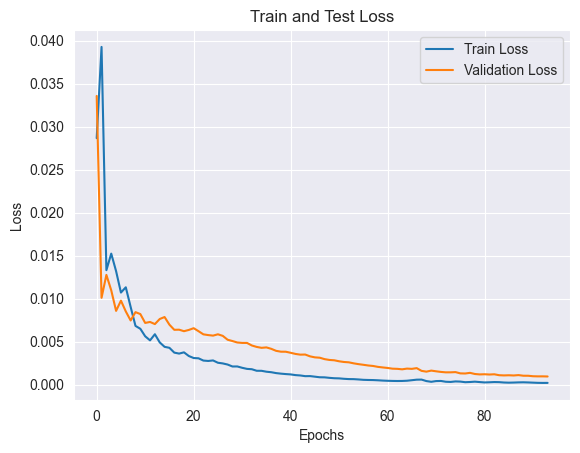

 95%|█████████▌| 95/100 [02:01<00:06,  1.38s/it]

Epoch :0.95    Train Loss :0.00020012502500321716    Test Loss :0.0009753823396749794


 96%|█████████▌| 96/100 [02:02<00:05,  1.34s/it]

Early stopping at epoch:  95


 97%|█████████▋| 97/100 [02:03<00:03,  1.31s/it]

Early stopping at epoch:  96


 98%|█████████▊| 98/100 [02:04<00:02,  1.26s/it]

Early stopping at epoch:  97


 99%|█████████▉| 99/100 [02:06<00:01,  1.25s/it]

Early stopping at epoch:  98


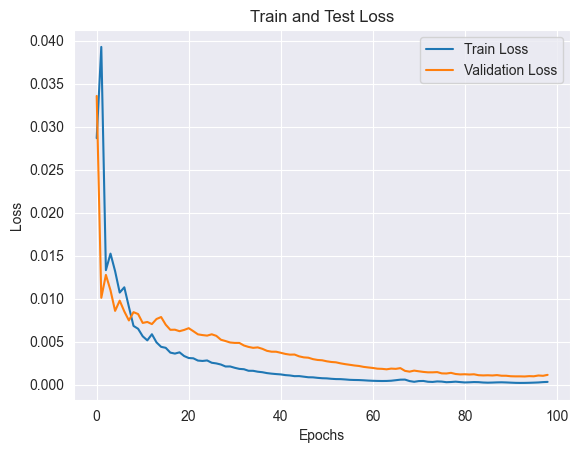

100%|██████████| 100/100 [02:07<00:00,  1.28s/it]

Epoch :1.0    Train Loss :0.00033587226062081754    Test Loss :0.0009949994273483753
Early stopping at epoch:  99


In [22]:
train_loss, test_loss = ut2.simpleTrain_model(model,
                                            criterion,
                                            optimizer,
                                            x_train,
                                            x_val,
                                            y_train,
                                            y_val,
                                            epochs=100)

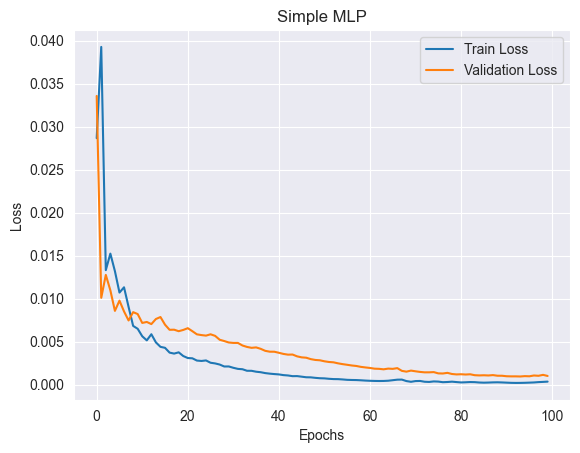

In [23]:
ut2.plot_loss(train_loss, test_loss, 'Simple MLP')

In [24]:
val_loss = np.asanyarray(test_loss)
train_loss = np.asanyarray(train_loss)
np.savetxt("train_lossSimpleLSTM.csv", train_loss, delimiter=",")
np.savetxt("val_lossSimpleLSTM.csv", val_loss, delimiter=",")

## **test predictions**

In [25]:
in_size = x_train.shape[-1]
out_size = 1
hid_size = x_train.shape[-1]//2
num_layers = 2

model = MLP(in_size, hid_size, out_size)
opt = optim.Adam(model.parameters(), lr=0.001)
utils.resume(model, opt,'SingleStepMLP_earlystop_99.pth')


In [26]:
test_pred = ut2.rollingWindowPrediction(model, x_test, steps = 50)

np.array(test_pred).shape

100%|██████████| 2000/2000 [01:08<00:00, 29.36it/s]


(2000, 50)

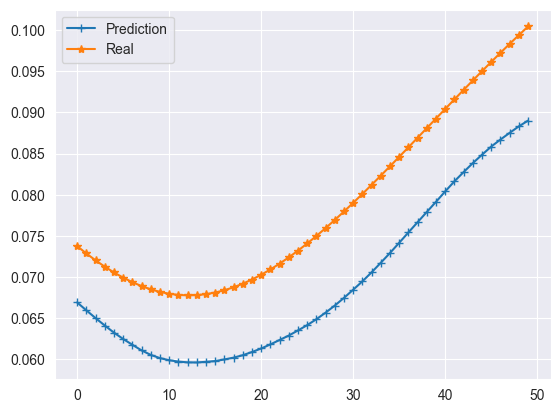

In [27]:
i = 65

plt.plot(test_pred[i],'-+', label='Prediction')
plt.plot(y_test[i:i+50].detach().numpy(), '-*',label='Real')
plt.legend()
plt.show()

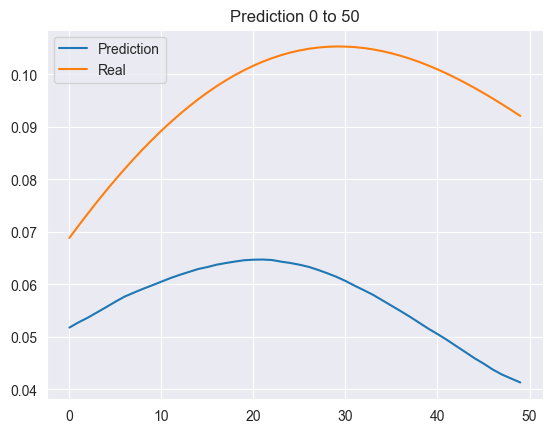

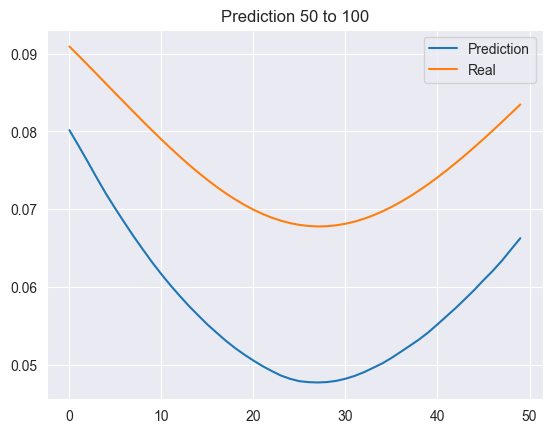

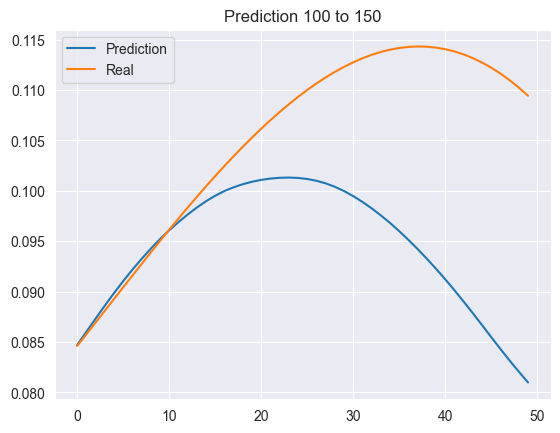

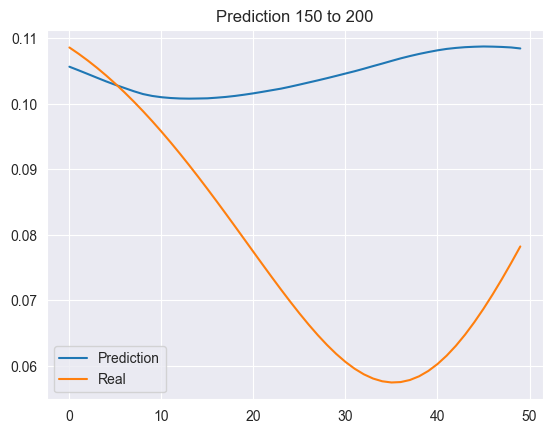

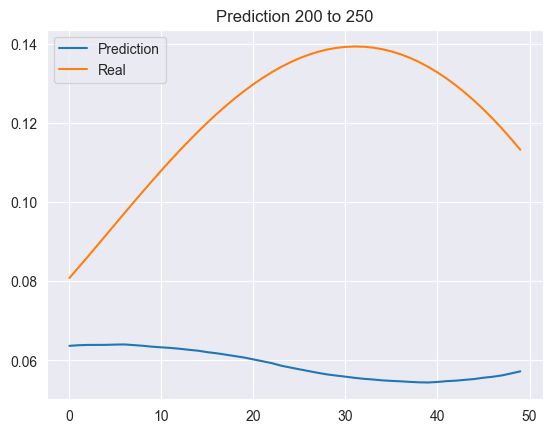

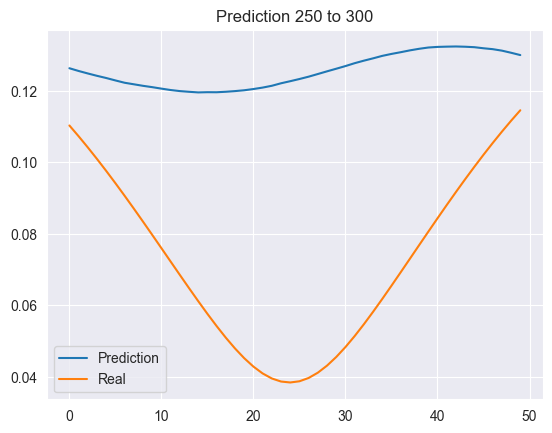

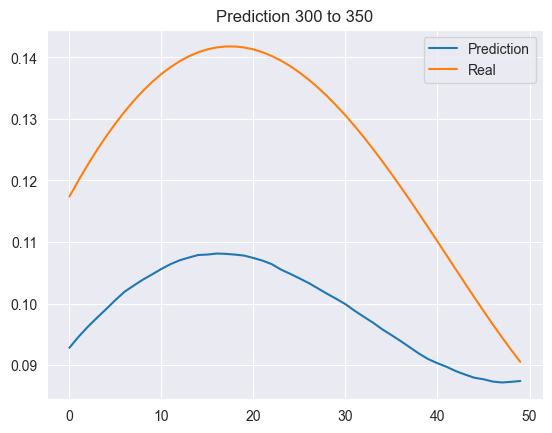

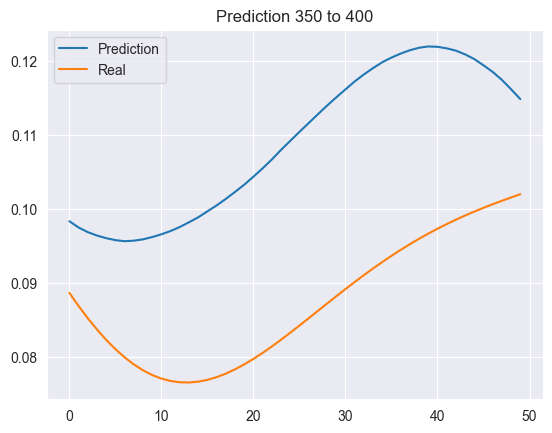

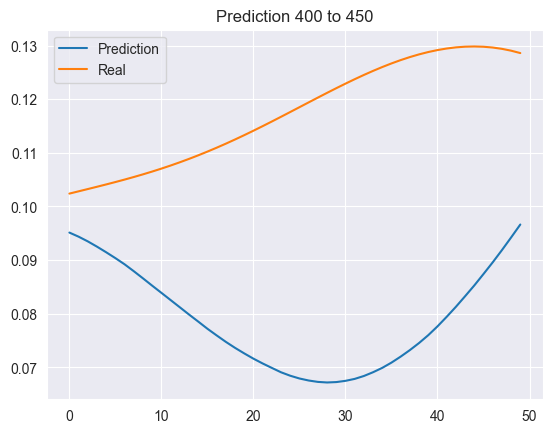

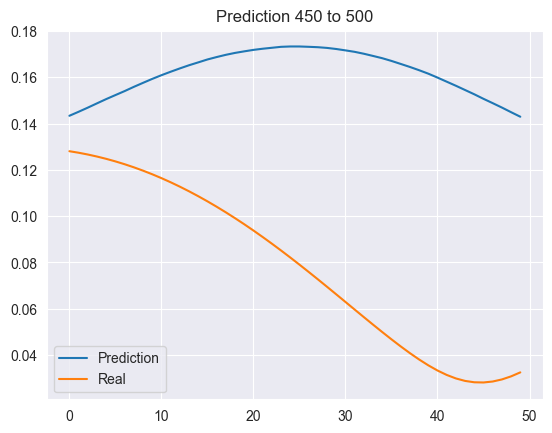

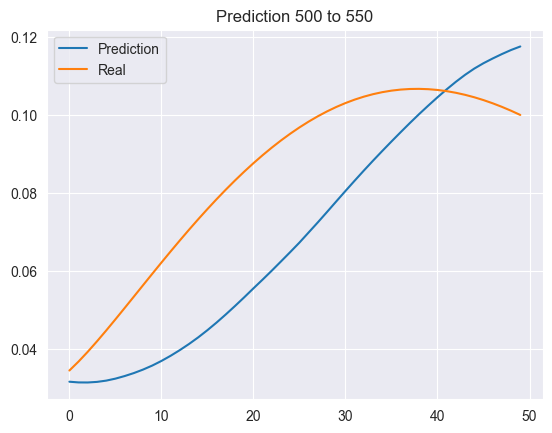

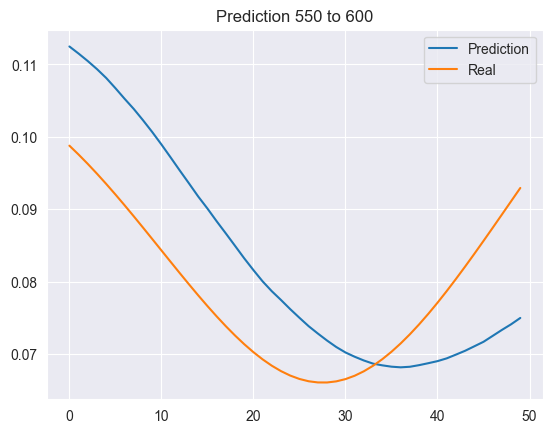

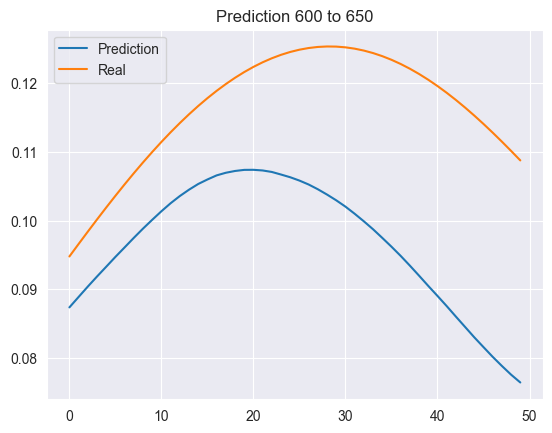

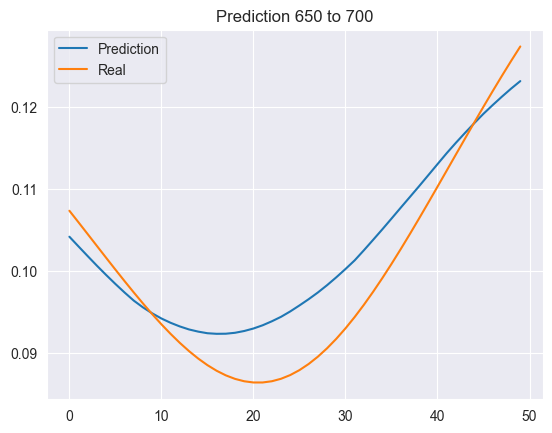

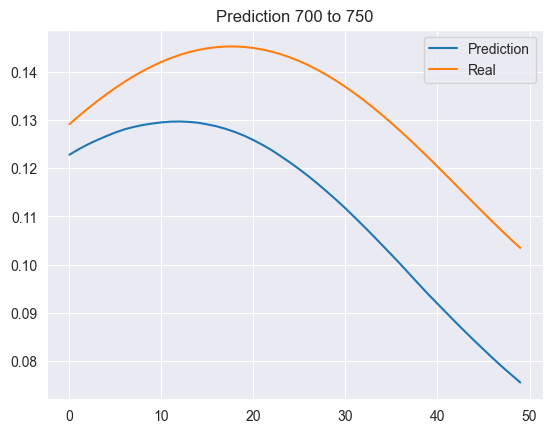

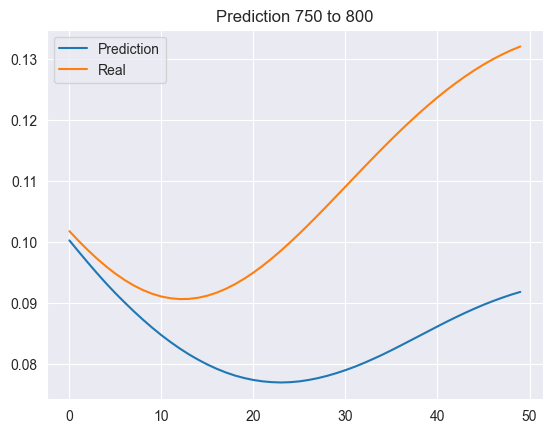

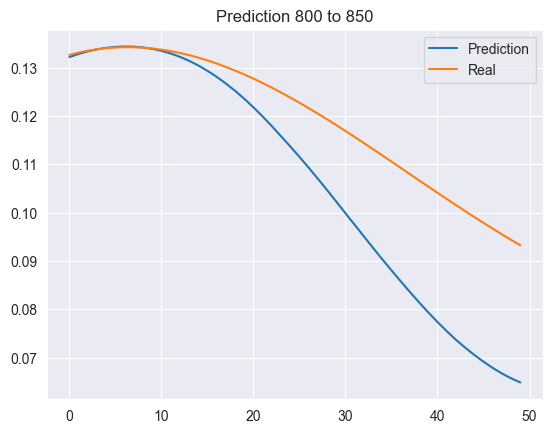

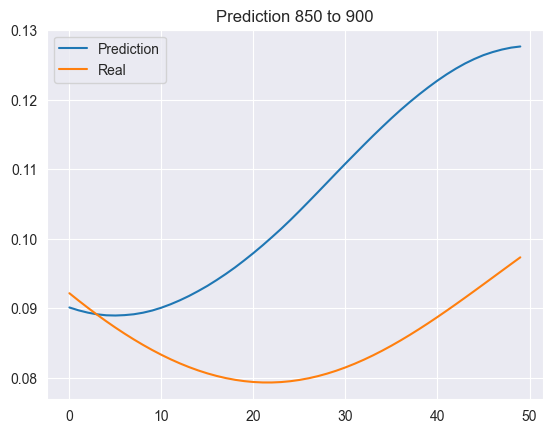

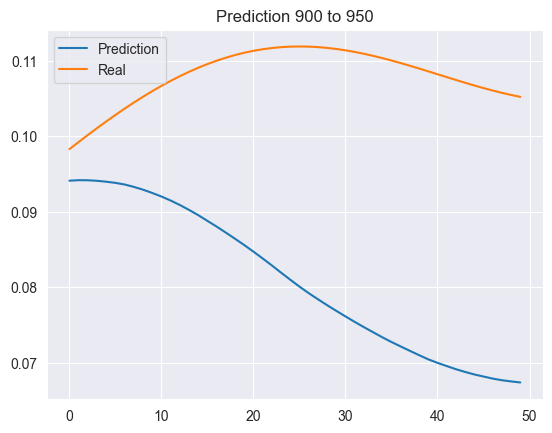

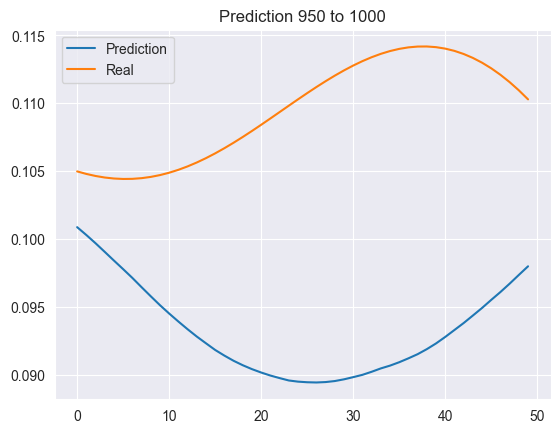

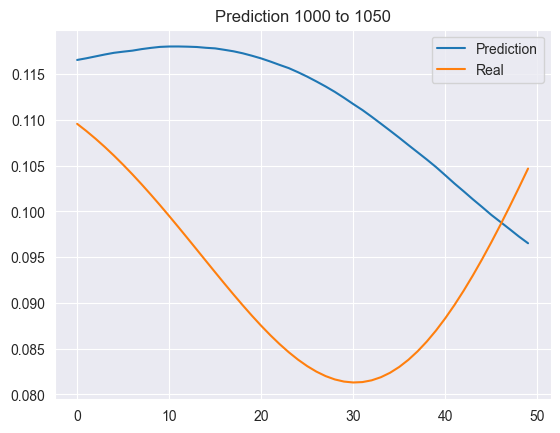

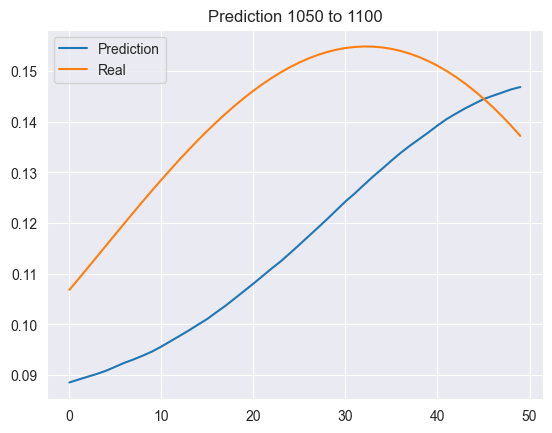

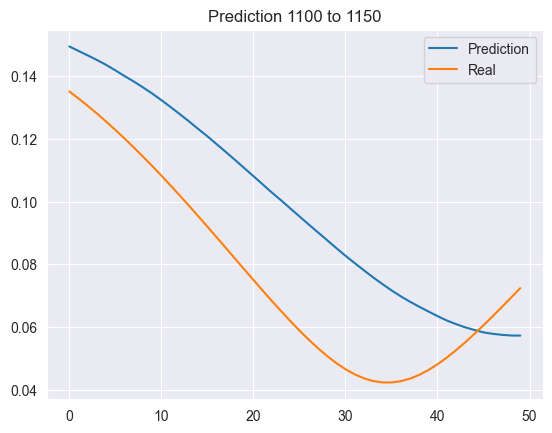

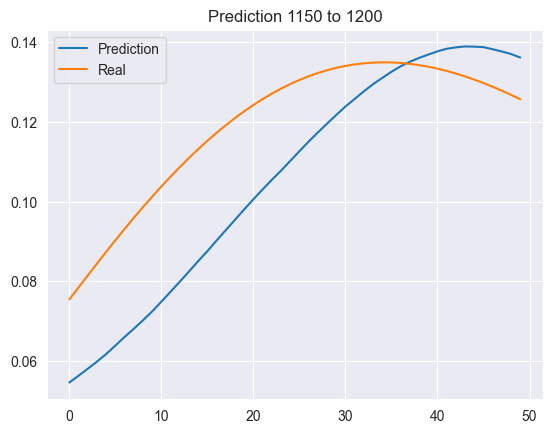

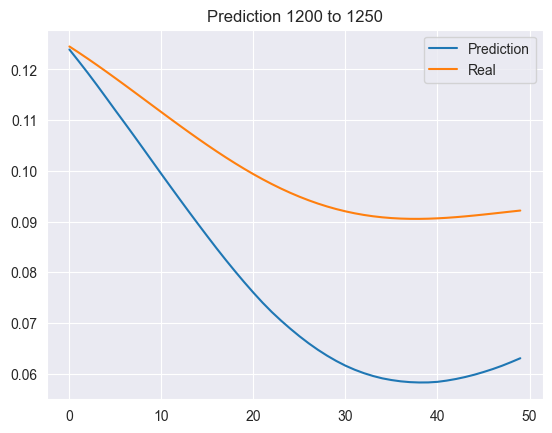

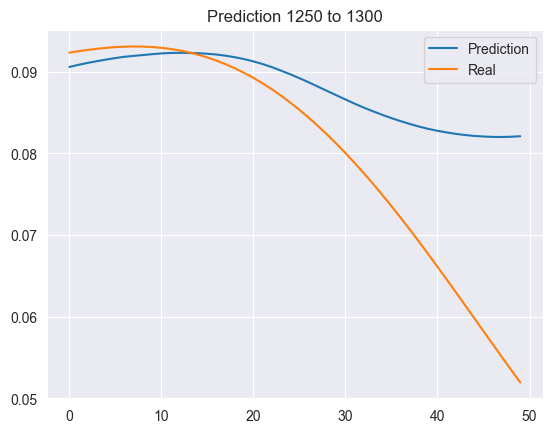

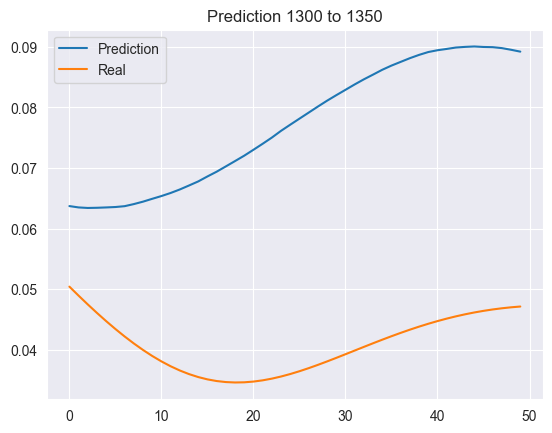

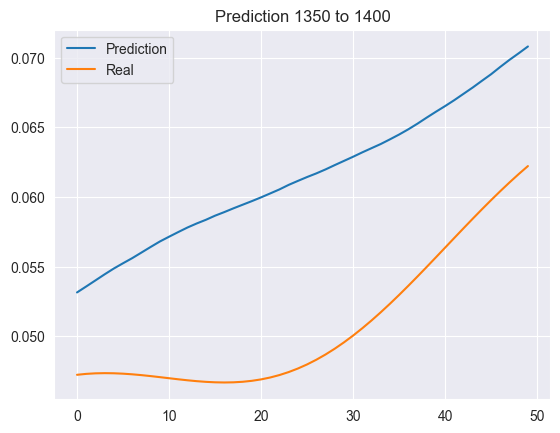

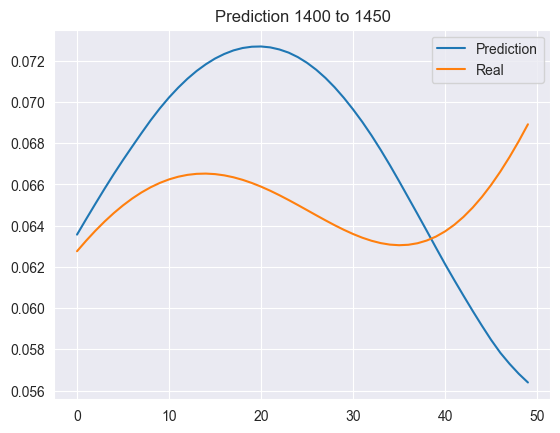

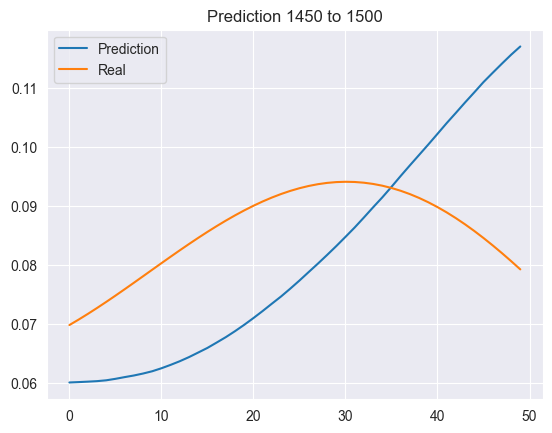

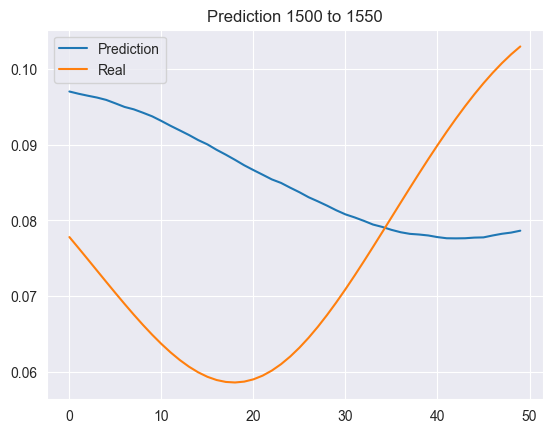

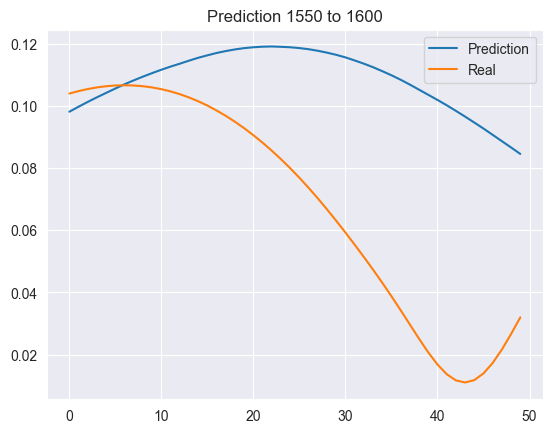

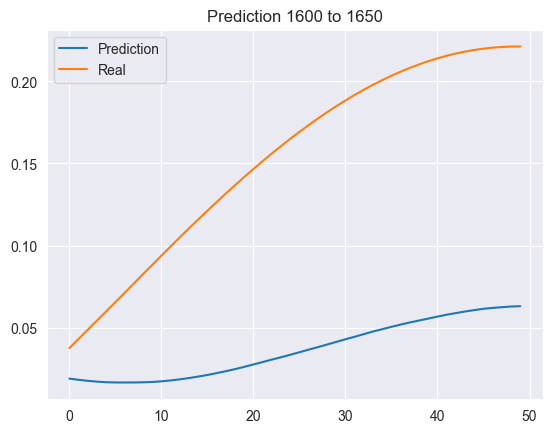

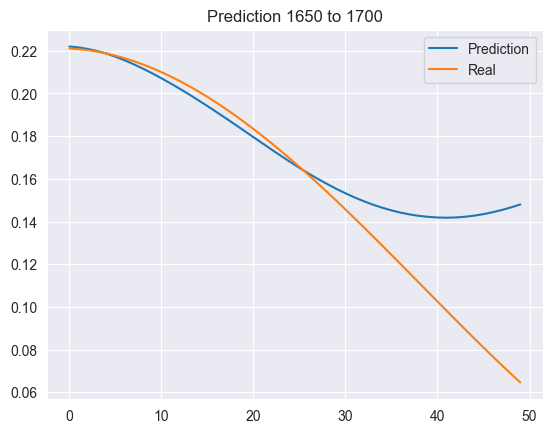

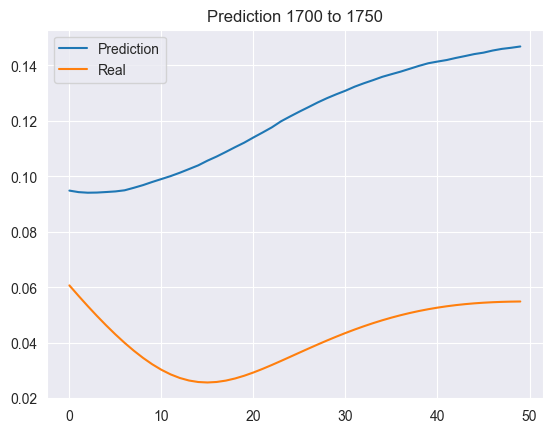

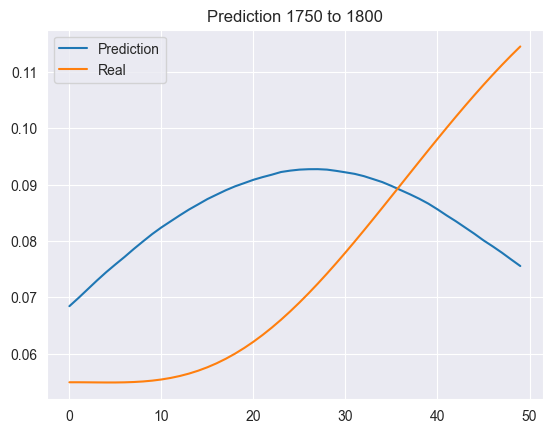

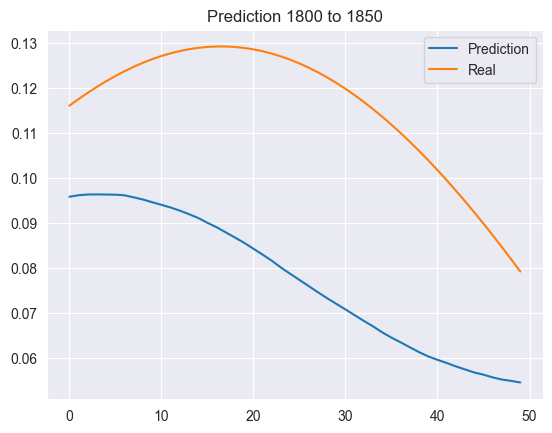

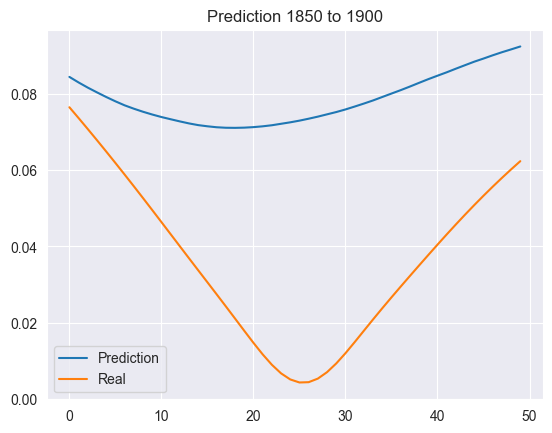

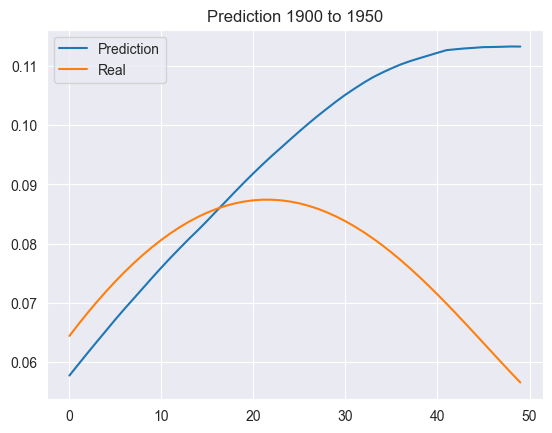

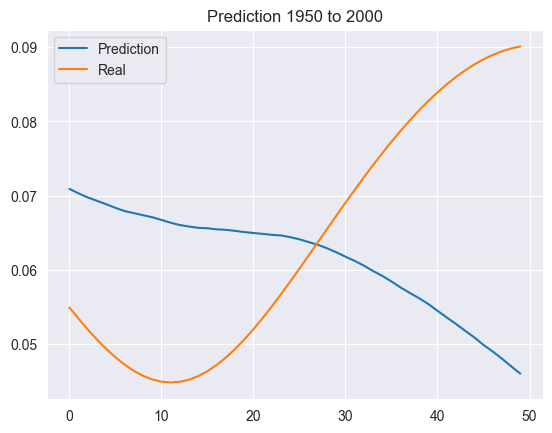

In [28]:
for i in range(0,len(test_pred), 50):
    plt.plot(test_pred[i], label='Prediction')
    plt.plot(y_test[i:i+50].detach().numpy(), label='Real')
    plt.title(f'Prediction {i} to {i+50}')
    plt.legend()
    plt.show()

## **errores**

In [33]:
import errores as er
x = er.error_metrics(test_pred[:-49], test_scaled[:3000], 50)

Mean Squared Error: 0.0014720992116573407
Mean Absolute Percentage Error: 0.4362785895806527
R2 Score: -0.19335805206178203
Root Mean Squared Error: 0.036256576393619656
